<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
Also known as the visible level, the input layer is what receives input from the dataset; it is the only part of the network that is exposed to the data and interacts with it directly.
### Hidden Layer:
Hidden layers are layers that come after the input layers in the neural net. They are "hidden" because they can only be accessed through the input layer; they are not exposed to the data, so we do not interact with hidden layers directly. Neural networks must have at least one hidden layer to output values. The word "deep" in "deep learning" is a reference to the depth of a neural network; a neural network is deep when it has multiple layers.
### Output Layer:
The final layer in a neural network is called an output layer. It outputs a vector of values appropriate for the problem we are using the neural network to solve. For instance, it might output a vector representing the probability that an observed phenomenon belongs to one class rather than to another.
### Neuron:
Neurons are the basic units in a neural network. A neuron receives a number of inputs, multiplies each input by a weight, sums all of these weighted inputs, adds a bias value to the sum of weighted inputs, and passes the sum of weighted inputs plus the bias value through an activation function.
### Weight:
Neurons multiply each input by a weight before summing these inputs, adding a bias value, and passing the sum of weighted inputs plus the bias value through an activation function.
### Activation Function:
Also known as transfer functions, each neuron in a neural network passes the sum of its weighted inputs plus a bias value through an activation function. Each neuron in a given layer usually has the same activation function. The activation function determines how much signal is transferred onto the next layer, determining whether the cell "fires" or not.
### Node Map:
Node maps are visual diagrams showing the architecture of a neural network, flow charts showing the path from input to output.
### Perceptron:
A perceptron is just a single neuron in a neural network with nothing else. It takes any number of inputs, multiples each of them by a weight, sums the weighted inputs, adds a bias value, passes the sum of weighted inputs plus the bias value through an activation function, and spits out the output.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

Each neuron in a neural network receives a number of inputs, multiplies each input by a weight, sums all of these weighted inputs, adds a bias value to the sum of weighted inputs, passes the sum of weighted inputs plus the bias value through an activation function, and spits out the output. In a neural network, some neurons are in the input layer, and others are in hidden layers. Neurons in the input layer take their input from the dataset; neurons in hidden layers have no direct interaction with the dataset, taking their input from neurons in previous layers. The final layer is the output layer; it outputs a vector of values appropriate for the problem we are using the neural network to solve.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [21]:
import numpy as np

inputs = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])

correct_outputs = [[1], [1], [1], [0]]

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [23]:
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.32591187],
       [-0.81283462],
       [ 0.80881119]])

In [24]:
for iteration in range(1000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-7.22145422]
 [-7.22145459]
 [10.88789235]]
Output after training
[[0.99998126]
 [0.97504601]
 [0.975046  ]
 [0.02781383]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [25]:
import pandas as pd

url = ('https://raw.githubusercontent.com/ryanleeallred/datasets/master/' +
       'diabetes.csv')

df = pd.read_csv(url, index_col = 0)

y = df.iloc[0:768, 7].values
X = df.iloc[0:768, [i for i in range(7)]].values

In [26]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 50):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

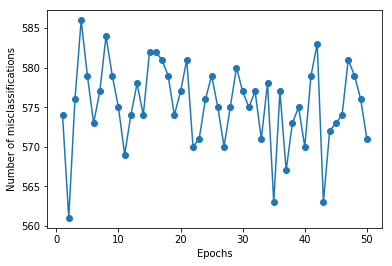

In [27]:
import matplotlib.pyplot as plt

pn = Perceptron(0.01, 50)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?